In [21]:
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import colorcet as cc
%matplotlib inline

# Load and subset data

In [22]:
adata_brain1 = ad.read_h5ad("../data/merfish_609882_AIT17.1_annotated_TH_ZI_only_2023-02-16_00-00-00/atlas_brain_609882_AIT17_1_annotated_TH_ZI_only.h5ad") #, backed='r')
adata_brain3 = ad.read_h5ad("../data/merfish_638850_AIT17.custom_CCF_annotated_TH_ZI_only_2023-05-04_00-00-00/atlas_brain_638850_AIT17_custom_CCF_annotated_TH_ZI_only.h5ad") #, backed='r')

## Subset to neurons

In [23]:
divisions_neuronal = [
                      #"2 Subpallium GABAergic",           # not many cells in brain3, but lots in RT/ZI in brain1
                      "3 PAL-sAMY-TH-HY-MB-HB neuronal",   # nearly all TH cells in brain3, vast majority in brain1
                      #"4 CBX-MOB-other neuronal"          # not many cells in this division in brain3, but lots in RT/ZI in brain1
                     ]

adata_brain1 = adata_brain1[adata_brain1.obs['division_id_label'].isin(divisions_neuronal)].copy()
adata_brain3 = adata_brain3[adata_brain3.obs['division_id_label'].isin(divisions_neuronal)].copy()

In [24]:
# move cirro coordinates into .obs for easier access
adata_brain1.obs['cirro_x'] = adata_brain1.obsm['spatial_cirro'][:,0]
adata_brain1.obs['cirro_y'] = adata_brain1.obsm['spatial_cirro'][:,1]

adata_brain3.obs['cirro_x'] = adata_brain3.obsm['spatial_cirro'][:,0]
adata_brain3.obs['cirro_y'] = adata_brain3.obsm['spatial_cirro'][:,1]

## Subset by section

selecting a good anterior, mid, and posterior section for presentations, etc.

In [25]:
section_brain1 = '1198980108' #1198980077, ----------, 1198980089, 1198980101, 1198980108, 1198980114, 1198980120, 1198980134
section_brain3 = '1199651045' #1199651060, 1199651057, 1199651054, 1199651048, 1199651045, 1199651042, 1199651039, 1199651033

adata_brain1 = adata_brain1[adata_brain1.obs['section']==section_brain1]
adata_brain3 = adata_brain3[adata_brain3.obs['section']==section_brain3]

# Color palettes

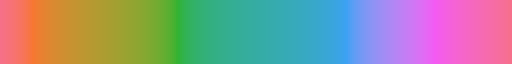

In [26]:
sns.color_palette('husl', as_cmap=True)

#bf03b8


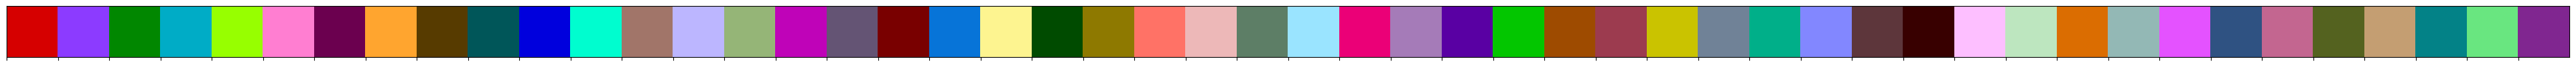

In [27]:
n_colors = 50
sample_palette = sns.color_palette(cc.glasbey, n_colors=n_colors)
sns.palplot(sample_palette)

palette_ind = 15
print(sample_palette.as_hex()[palette_ind])

# Cell type mapping labels

## Cluster level

Two very different ways of visualizing cluster labels, emphasizing similarity (top, via cluster_id) vs distinctness (bottom, via cluster_label) of 'adjacent' clusters.

### Cluster IDs

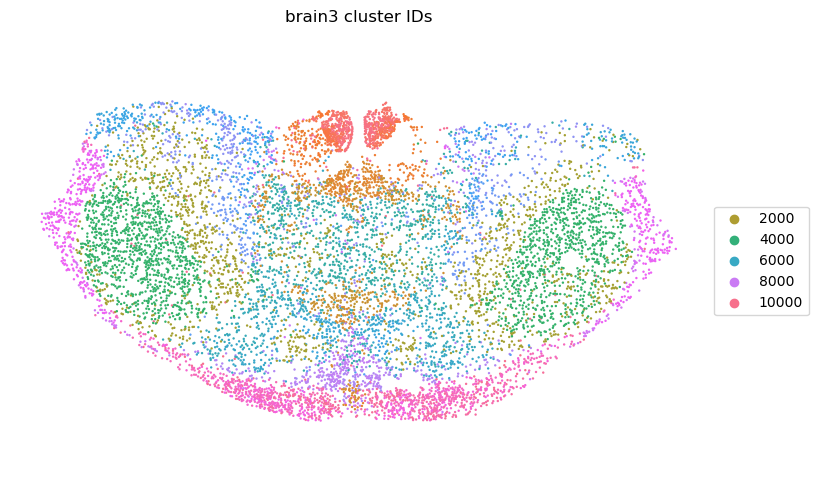

In [28]:
# # brain 1
# plt.figure(figsize=(9,6))
# sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y', 
#                      hue=adata_brain1.obs['cluster_id'].rank(), 
#                      palette='husl', 
#                      alpha=1, s=3, linewidth=0,
#                      legend=True)

# # formatting cleanup
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.axis('equal')
# plt.title('brain1 cluster IDs')
# sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
# sc.tick_params(left=False, bottom=False)
# sc.spines[['right', 'left','top','bottom']].set_visible(False)


# brain3
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y', 
                     hue=adata_brain3.obs['cluster_id'].rank(), 
                     palette='husl', 
                     alpha=1, s=3, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.axis('equal')
plt.title('brain3 cluster IDs')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)

### Cluster labels

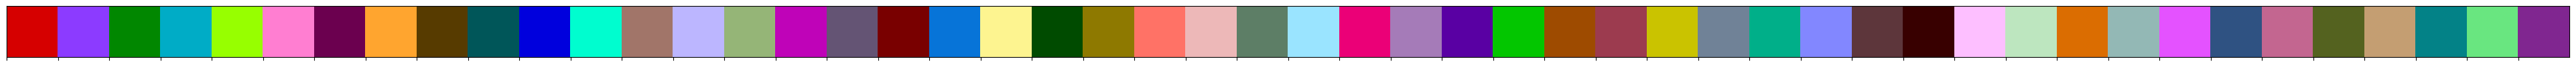

In [29]:
cluster_labels = sorted(list(set(adata_brain1.obs['cluster_label']) | set(adata_brain3.obs['cluster_label'])))
# cluster_labels = sorted(adata_brain3.obs['cluster_label'].tolist())
nclust = len(cluster_labels)
clust_palette = sns.color_palette(cc.glasbey, n_colors=nclust)
clust_dict = dict(zip(cluster_labels,clust_palette))

# show first 50 colors
sns.palplot(clust_palette[:50])

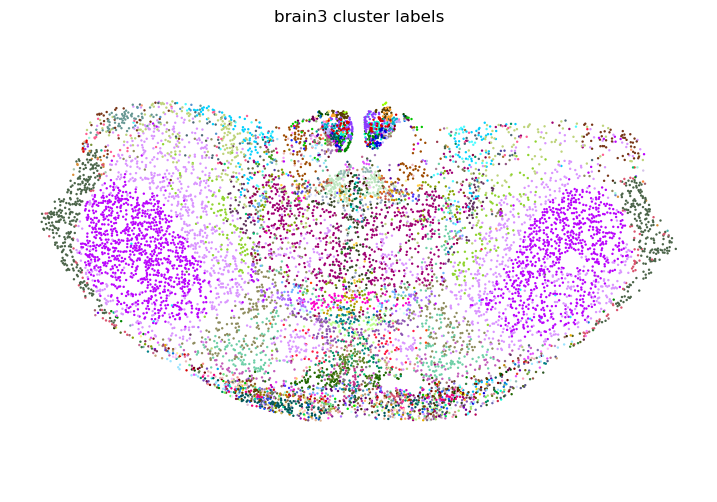

In [30]:
# # brain1
# plt.figure(figsize=(9,6))
# sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y', 
#                      hue=adata_brain1.obs['cluster_label'], 
#                      palette=clust_dict,
#                      alpha=1, s=3, linewidth=0,
#                      legend=False)

# # formatting cleanup
# # plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
# plt.axis('equal')
# plt.title('brain1 cluster labels')
# sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
# sc.tick_params(left=False, bottom=False)
# sc.spines[['right', 'left','top','bottom']].set_visible(False)


# brain3
plt.figure(figsize=(9,6))
sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y', 
                     hue=adata_brain3.obs['cluster_label'], 
                     palette=clust_dict,
                     alpha=1, s=3, linewidth=0,
                     legend=False)

# formatting cleanup
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.axis('equal')
plt.title('brain3 cluster labels')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)

## plot_supertypes_separately()

In [31]:
def plot_supertypes_separately(ad, obs_col, n_subplot_cols=4, color_palette=None):
    
    fig = plt.figure(figsize=(30, 50))

    # set grid geometry based on the number of categories
    type_category_ids = ad.obs[obs_col].cat.categories.tolist()
    n_cols = n_subplot_cols
    n_rows = int(np.ceil(len(type_category_ids)/n_cols))

    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # creates 2x2 grid of axes
                     axes_pad=(0.1,0.6),  # pad between axes in inch.
                     share_all=True
                     )

    # set marker size
    marker_size = 3 #20000/ad.shape[0]

    # plot each category separately
    for i, category in enumerate(type_category_ids):
        ax = grid[i]

        # split off current category from all others
        curr_category_ad = ad[ad.obs[obs_col]==category]
        other_categories_ad = ad[ad.obs[obs_col]!=category]

        # plot all other categories in grey
        s0 = ax.scatter(other_categories_ad.obs['cirro_x'],
                        other_categories_ad.obs['cirro_y'],
                        c='silver', s=marker_size/2, alpha=0.1)

        # plot current category in it's assigned color
        curr_category_color = color_palette[category]
        s0 = ax.scatter(curr_category_ad.obs['cirro_x'],
                        curr_category_ad.obs['cirro_y'],
                        c=curr_category_color, s=marker_size,
                        label=str(category))
        lgd = ax.legend(loc="lower center", bbox_to_anchor=(0.5,0.95), 
                        frameon=False, markerscale=7, fontsize=12)
        ax.set_aspect('equal', 'box')
        # hide all x-y axes, ticks, labels, etc.
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
        
        n_plots = i  # counter so we can hide extra grids at the end

    # turn off axes for the empty subplots, which is just a hacky fix because
    # ngrids=len(svg) doesn't work in this version of matplotlib
    for j in np.arange(n_plots+1,((n_cols*n_rows))):
        ax = grid[j]
        ax.set_visible(False)
        
    # Save
    # fig.savefig(results_dir+'brain3_'+sec_name+'_clusters_'+obs_col+'_indiv.png', bbox_inches='tight')
        
    return fig

## Supertype level

In [32]:
# get counts of each taxonomy level across both brains
category_name = 'supertype_id_label'
min_cells = 10

cat_counts_brain1 = adata_brain1.obs[category_name].value_counts()
cat_counts_brain3 = adata_brain3.obs[category_name].value_counts()
cat_counts_combined = cat_counts_brain1.add(cat_counts_brain3, fill_value=0)

# sort by cell count
cat_counts_by_n_cells = cat_counts_combined.sort_values(ascending=False)
cats_by_n_cells = cat_counts_by_n_cells.index.tolist()
# print(cats_by_n_cells)

cats_to_other = cat_counts_by_n_cells[cat_counts_by_n_cells.values < min_cells].index.tolist()
cats_to_other_brain1 = [x for x in cats_to_other if x in adata_brain1.obs[category_name].cat.categories]
cats_to_other_brain3 = [x for x in cats_to_other if x in adata_brain3.obs[category_name].cat.categories]

n_cats_to_keep = len(cat_counts_by_n_cells[cat_counts_by_n_cells.values >= min_cells])
n_cats_to_other = len(cats_to_other)
print(f'{n_cats_to_keep=}')
print(f'{n_cats_to_other=}')

n_cats_to_keep=77
n_cats_to_other=143


In [33]:
# cats_to_other_brain1 = [x for x in cats_to_other if x in adata_brain1.obs[category_name].cat.categories]
# cats_to_other_brain3 = [x for x in cats_to_other if x in adata_brain3.obs[category_name].cat.categories]
# print(f'{len(cats_to_other)=}')
# print(f'{len(cats_to_other_brain1)=}')
# print(f'{len(cats_to_other_brain3)=}')

In [34]:
other_label = str(n_cats_to_other)+' other supertypes (n_cells < 10)'  # 'None' - will automatically color them grey in sns, but maybe not with a palette dict?
new_cat_name = 'st_label_grouped'

adata_brain1.obs[new_cat_name] = adata_brain1.obs[category_name].copy()
adata_brain1.obs[new_cat_name] = adata_brain1.obs[new_cat_name].cat.add_categories(other_label)

adata_brain3.obs[new_cat_name] = adata_brain3.obs[category_name].copy()
adata_brain3.obs[new_cat_name] = adata_brain3.obs[new_cat_name].cat.add_categories(other_label)

# assign other_label to all supertypes with <min_cells
adata_brain1.obs.loc[adata_brain1.obs[category_name].isin(cats_to_other), new_cat_name] = other_label
adata_brain3.obs.loc[adata_brain3.obs[category_name].isin(cats_to_other), new_cat_name] = other_label

# now reset categories to remove the labels that were just replaced with other_label
# need to do this brain-specific lists
adata_brain1.obs[new_cat_name] = adata_brain1.obs[new_cat_name].cat.remove_categories(cats_to_other_brain1)
adata_brain3.obs[new_cat_name] = adata_brain3.obs[new_cat_name].cat.remove_categories(cats_to_other_brain3)

# new counts
new_cat_counts_brain1 = adata_brain1.obs[new_cat_name].value_counts()
new_cat_counts_brain3 = adata_brain3.obs[new_cat_name].value_counts()
# order categories by new count
adata_brain1.obs[new_cat_name] = adata_brain1.obs[new_cat_name].cat.set_categories(new_cat_counts_brain1.index.tolist())
adata_brain3.obs[new_cat_name] = adata_brain3.obs[new_cat_name].cat.set_categories(new_cat_counts_brain3.index.tolist())

new_cat_counts_combined = new_cat_counts_brain1.add(new_cat_counts_brain3, fill_value=0).sort_values(ascending=False)
cat_labels_for_plot = new_cat_counts_combined.index.tolist()
# cat_labels_for_plot

<ipython-input-34-43f6889dbf50>:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_brain1.obs[new_cat_name] = adata_brain1.obs[category_name].copy()
/opt/conda/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
<ipython-input-34-43f6889dbf50>:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_brain3.obs[new_cat_name] = adata_brain3.obs[category_name].copy()
/opt/conda/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to ge

In [35]:
# st_labels = sorted(list(set(adata_brain1.obs['supertype_id_label']) | set(adata_brain3.obs['supertype_id_label'])))
n_st = len(cat_labels_for_plot)
st_palette = sns.color_palette(cc.glasbey, n_colors=n_st)
st_palette_dict = dict(zip(cat_labels_for_plot, st_palette))
# st_palette

st_palette_dict_others_grey = st_palette_dict
st_palette_dict_others_grey[other_label] = '#C0C0C0'

In [36]:
# marker_size = 4
# # brain1
# plt.figure(figsize=(9,12))
# sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y',
#                      hue=adata_brain1.obs[new_cat_name], 
#                      palette=st_palette_dict_others_grey, 
#                      alpha=1, s=marker_size, linewidth=0,
#                      legend=True)

# # formatting cleanup
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=2)
# plt.axis('equal')
# plt.title('brain1 supertypes')
# sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
# sc.tick_params(left=False, bottom=False)
# sc.spines[['right', 'left','top','bottom']].set_visible(False)

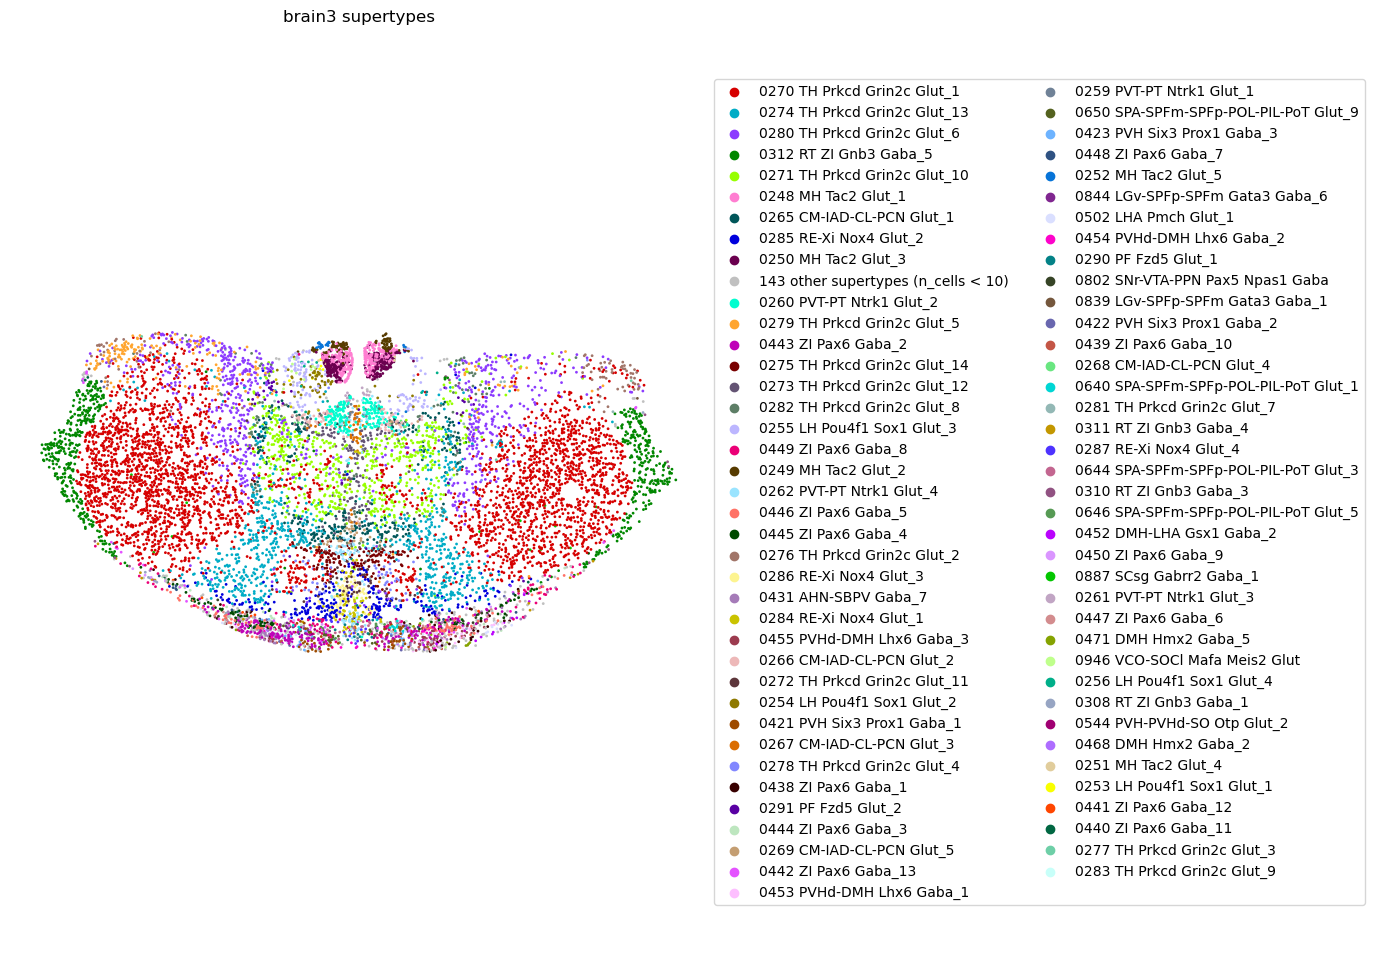

In [37]:
marker_size = 4
# brain3
plt.figure(figsize=(9,12))
sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y',
                     hue=adata_brain3.obs[new_cat_name], 
                     palette=st_palette_dict_others_grey, 
                     alpha=1, s=marker_size, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=2)
plt.axis('equal')
plt.title('brain3 supertypes')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)

<ipython-input-31-a1bee2c55fee>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  s0 = ax.scatter(curr_category_ad.obs['cirro_x'],


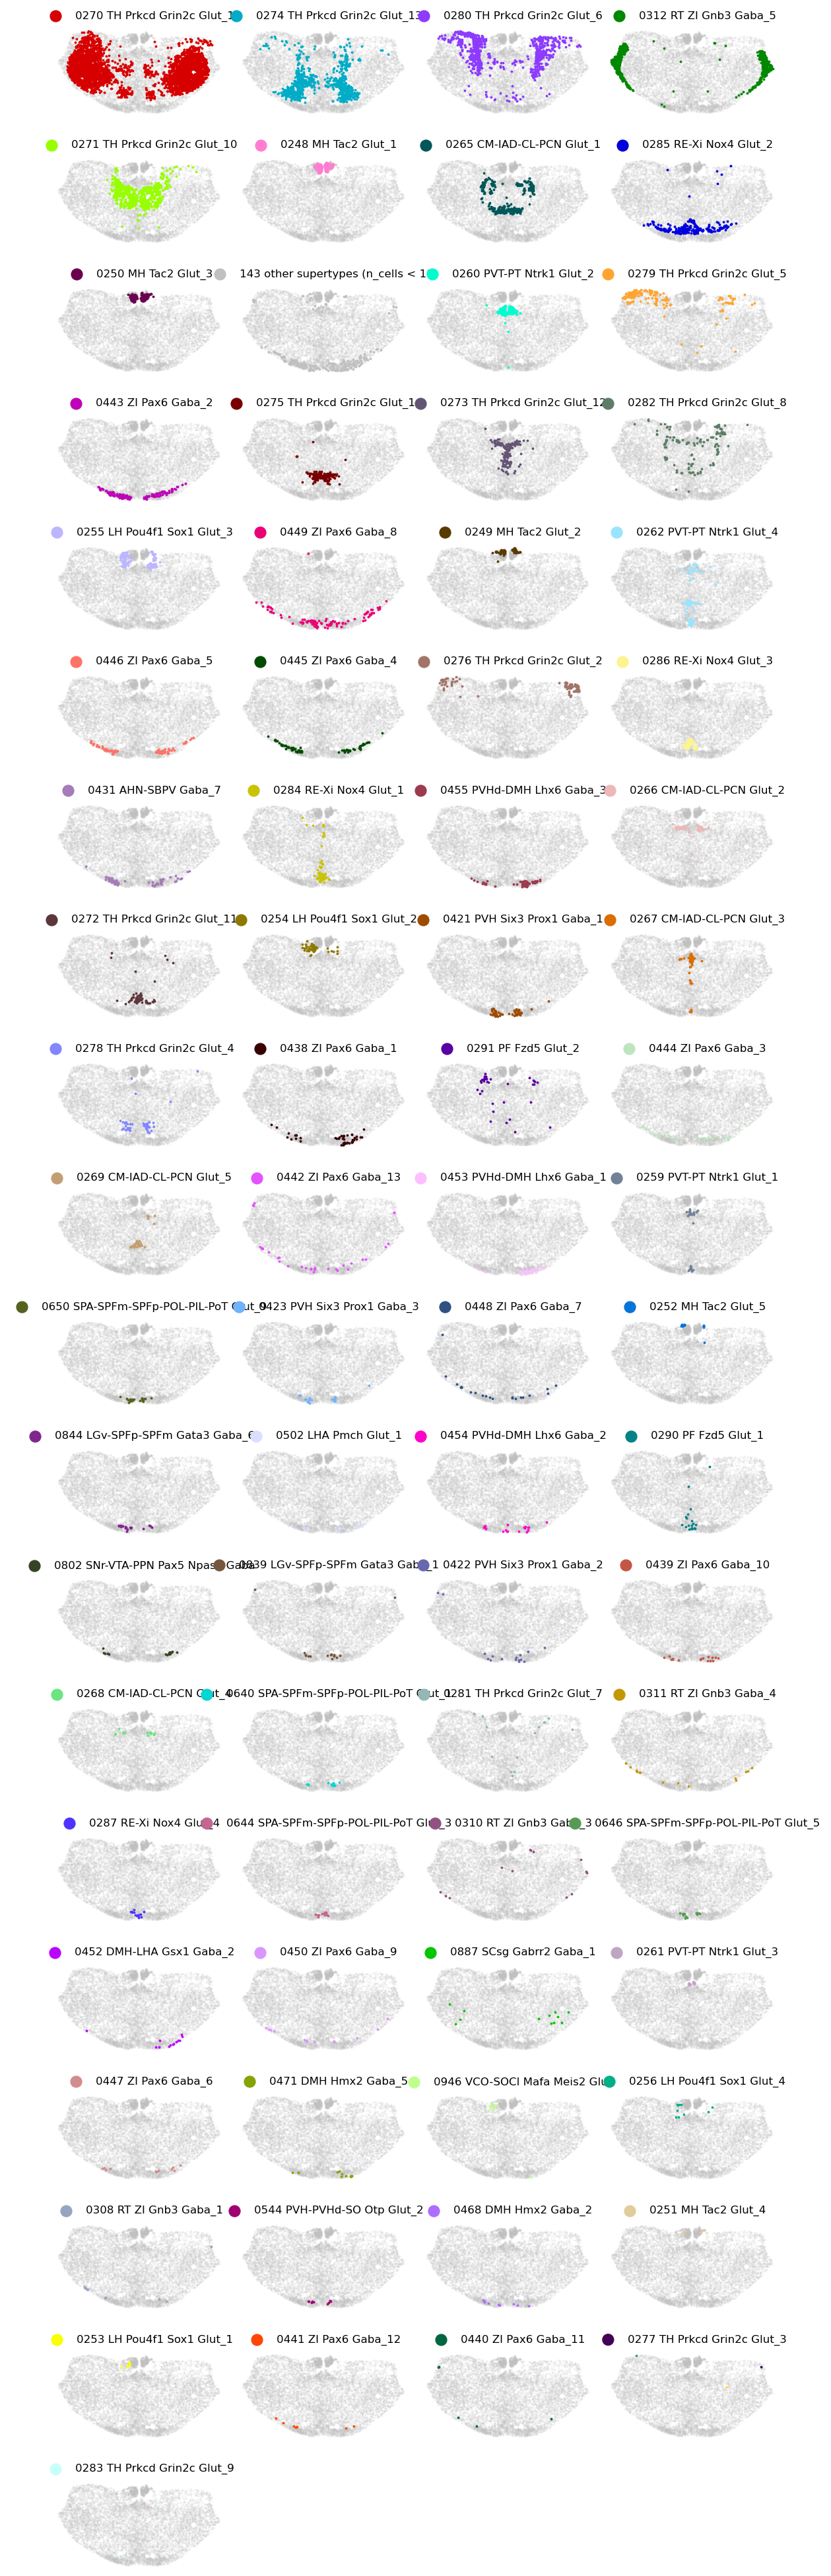

In [38]:
fig_st_indiv = plot_supertypes_separately(adata_brain3, new_cat_name,
                                         n_subplot_cols=4,
                                         color_palette=st_palette_dict_others_grey)

## Subclass level

In [39]:
sbc_labels = sorted(list(set(adata_brain1.obs['subclass_id_label']) | set(adata_brain3.obs['subclass_id_label'])))
n_sbc = len(sbc_labels)
sbc_palette = sns.color_palette(cc.glasbey, n_colors=n_sbc)
sbc_palette_dict = dict(zip(sbc_labels, sbc_palette))

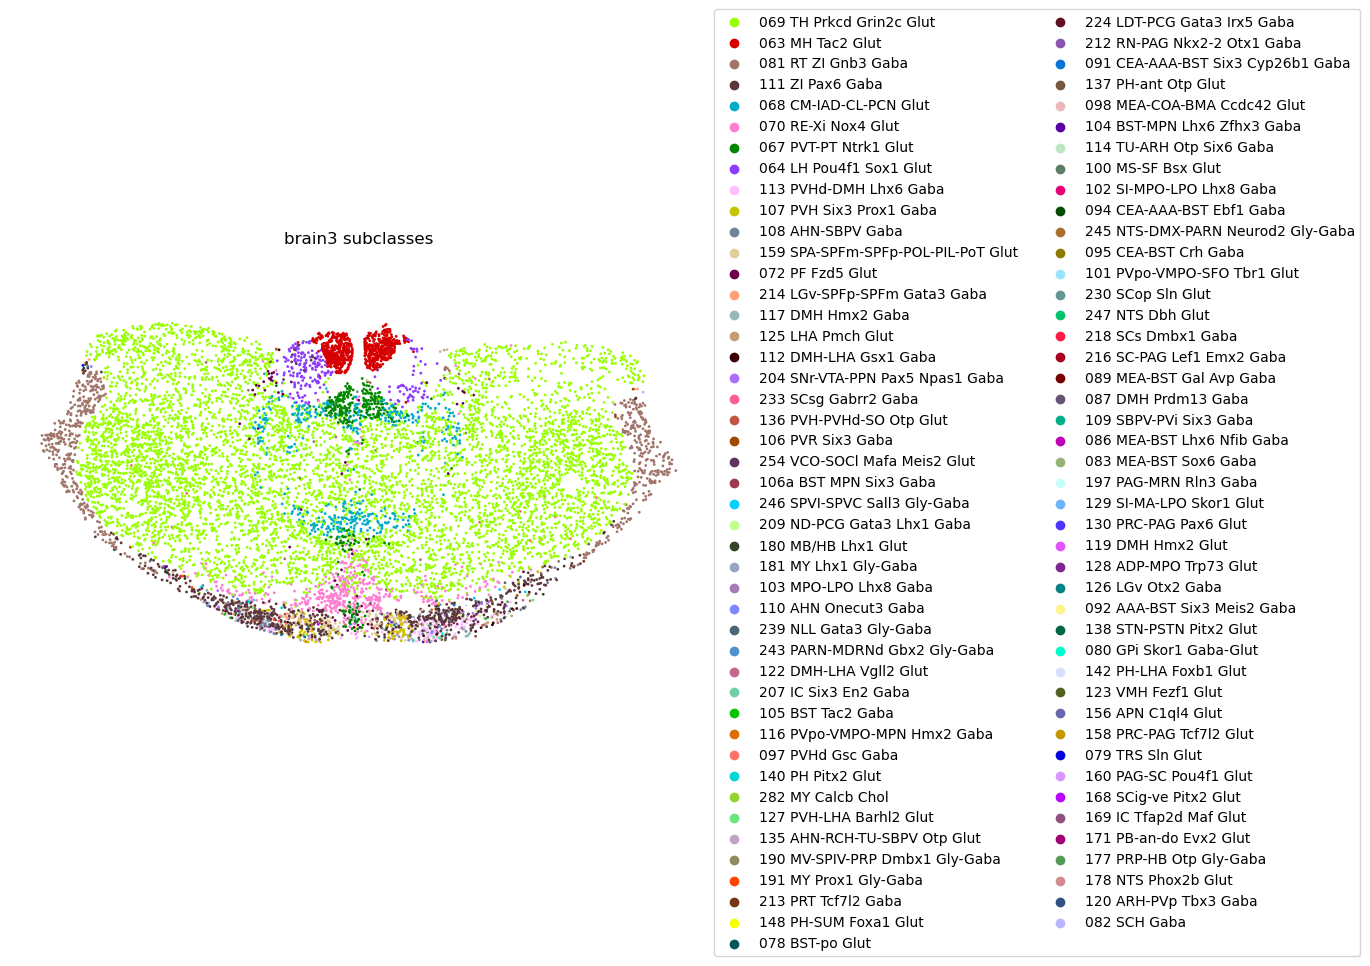

In [40]:
marker_size = 4
# # brain1
# plt.figure(figsize=(9,6))
# sc = sns.scatterplot(data=adata_brain1.obs, x='cirro_x', y='cirro_y',
#                      hue=adata_brain1.obs['subclass_id_label'], 
#                      palette=sbc_palette_dict, 
#                      alpha=1, s=marker_size, linewidth=0,
#                      legend=True)

# # formatting cleanup
# plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=2)
# plt.axis('equal')
# plt.title('brain1 subclasses')
# sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
# sc.tick_params(left=False, bottom=False)
# sc.spines[['right', 'left','top','bottom']].set_visible(False)


# brain3
# cell counts
subclass_rank_list = adata_brain3.obs['subclass_id_label'].value_counts().index.tolist()
# order subclasses by count
adata_brain3.obs['subclass_id_label'] = adata_brain3.obs['subclass_id_label'].cat.set_categories(subclass_rank_list)
plt.figure(figsize=(9,6))

sc = sns.scatterplot(data=adata_brain3.obs, x='cirro_x', y='cirro_y',
                     hue=adata_brain3.obs['subclass_id_label'], 
                     palette=sbc_palette_dict, 
                     alpha=1, s=marker_size, linewidth=0,
                     legend=True)

# formatting cleanup
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), ncol=2)
plt.axis('equal')
plt.title('brain3 subclasses')
sc.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
sc.tick_params(left=False, bottom=False)
sc.spines[['right', 'left','top','bottom']].set_visible(False)